In [25]:
import json
import os
from os.path import join
import glob
import xml.etree.ElementTree as ET
import pickle
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [26]:
#to dji_training
dataset_path = '/home/leeyh/detection/detector/data_training/'
classes_name = []
classes_tags = []

In [41]:
for path in glob.glob(os.path.join(dataset_path, '*')):
    classes_name.append(path.replace(dataset_path,''))
    class_tag = []
    for gt_file in glob.glob(os.path.join(path, '*.xml')):
        class_tag_pair = []
        gt_img = gt_file.replace('.xml','.jpg')
        tree = ET.ElementTree(file=gt_file)
        b=np.zeros(4,dtype=float)
        for elem in tree.iter():
            if(elem.tag=='xmin'):
                b[0]=float(elem.text)
            if(elem.tag=='xmax'):
                b[1]=float(elem.text)
            if(elem.tag=='ymin'):
                b[2]=float(elem.text)
            if(elem.tag=='ymax'):
                b[3]=float(elem.text)
        if b[2]!= 0  and b[3]!= 0:
            img = Image.open(gt_img).convert('RGB')
            size = img.size
            bs = [(b[1]-b[0])*1./size[0],\
                  (b[3]-b[2])*1./size[1],\
                  (b[1]+b[0])*0.5/size[0],\
                 (b[2]+b[3])*0.5/size[1]]
            class_tag_pair.append(gt_img)
            class_tag_pair.append(bs)
            class_tag.append(class_tag_pair)
    classes_tags.append(class_tag)
    print path
            
        

/home/leeyh/detection/detector/data_training/person9
/home/leeyh/detection/detector/data_training/person27
/home/leeyh/detection/detector/data_training/wakeboard4
/home/leeyh/detection/detector/data_training/building1
/home/leeyh/detection/detector/data_training/person1
/home/leeyh/detection/detector/data_training/car23
/home/leeyh/detection/detector/data_training/riding1
/home/leeyh/detection/detector/data_training/boat2
/home/leeyh/detection/detector/data_training/riding14
/home/leeyh/detection/detector/data_training/car6
/home/leeyh/detection/detector/data_training/person11
/home/leeyh/detection/detector/data_training/person3
/home/leeyh/detection/detector/data_training/drone3
/home/leeyh/detection/detector/data_training/riding9
/home/leeyh/detection/detector/data_training/riding10
/home/leeyh/detection/detector/data_training/riding6
/home/leeyh/detection/detector/data_training/drone4
/home/leeyh/detection/detector/data_training/person14
/home/leeyh/detection/detector/data_training/

In [60]:
with open('dji.txt', 'w') as outfile:
    json.dump(classes_tags, outfile)

In [61]:
with open('dji.txt', 'r') as outfile:
    data_loaded = json.load(outfile)

In [572]:
#to UAV123
dataset_path = '/home/leeyh/Downloads/UAV123/data_seq/UAV123/'
gts_path = '/home/leeyh/Downloads/UAV123/anno/UAV/'

In [573]:
classes_name = []
classes_tags = []
for path in glob.glob(os.path.join(gts_path, '*.txt')):
    classes_name.append(path.replace(gts_path,'').replace('.txt',''))
    
    gts = np.loadtxt(path,delimiter = ',')
    class_tag = []
    
    img_folder_path = os.path.join(dataset_path, path.replace(gts_path,'').replace('.txt',''))
    print img_folder_path
    for i in xrange(len(gts)):
        class_tag_pair = []
        gt_img = os.path.join(img_folder_path,'%06d.jpg'%(i+1))

        if os.path.exists(gt_img):
            if gts[i][2]!=0 and gts[i][3]!= 0 and np.isnan(gts[i][2]) ==False and  np.isnan(gts[i][3]) ==False:
                img = Image.open(gt_img).convert('RGB')
                size = img.size
                bs = [gts[i][2]/size[0],gts[i][3]/size[1],gts[i][0]/size[0],gts[i][1]/size[1]]
                class_tag_pair.append(gt_img)
                class_tag_pair.append(bs)
                class_tag.append(class_tag_pair)
    classes_tags.append(class_tag)

/home/leeyh/Downloads/UAV123/data_seq/UAV123/person22
/home/leeyh/Downloads/UAV123/data_seq/UAV123/car1
/home/leeyh/Downloads/UAV123/data_seq/UAV123/car1_s
/home/leeyh/Downloads/UAV123/data_seq/UAV123/person10
/home/leeyh/Downloads/UAV123/data_seq/UAV123/car5
/home/leeyh/Downloads/UAV123/data_seq/UAV123/person11
/home/leeyh/Downloads/UAV123/data_seq/UAV123/building4
/home/leeyh/Downloads/UAV123/data_seq/UAV123/building2
/home/leeyh/Downloads/UAV123/data_seq/UAV123/person8
/home/leeyh/Downloads/UAV123/data_seq/UAV123/uav5
/home/leeyh/Downloads/UAV123/data_seq/UAV123/car8
/home/leeyh/Downloads/UAV123/data_seq/UAV123/uav3
/home/leeyh/Downloads/UAV123/data_seq/UAV123/group1
/home/leeyh/Downloads/UAV123/data_seq/UAV123/car15
/home/leeyh/Downloads/UAV123/data_seq/UAV123/wakeboard3
/home/leeyh/Downloads/UAV123/data_seq/UAV123/car17
/home/leeyh/Downloads/UAV123/data_seq/UAV123/person1_s
/home/leeyh/Downloads/UAV123/data_seq/UAV123/person21
/home/leeyh/Downloads/UAV123/data_seq/UAV123/uav2
/hom

In [574]:
for seq in classes_tags:
    for fr in seq:
        fr[1][2] = fr[1][2] + fr[1][0]/2
        fr[1][3] = fr[1][3] + fr[1][1]/2

In [575]:
with open('uav.txt', 'w') as outfile:
    json.dump(classes_tags, outfile)

In [19]:
with open('test.txt', 'r') as outfile:
    data_loaded = json.load(outfile)

In [20]:
a = random.choice(data_loaded)
b = random.choice(a)

In [24]:
random.randint(-1,1)

-1

In [11]:
data_loaded[0][1]

['/home/leeyh/Downloads/dji_test/sample/993.jpg',
 [0.034375, 0.08055555555555556, 0.4875, 0.5208333333333334]]

In [938]:
ind = 0

In [939]:
len(data_loaded[ind])-1

995

In [970]:
a = data_loaded[ind][5]

In [971]:
img = Image.open(a[0])

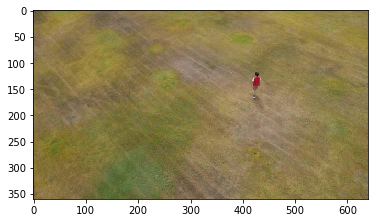

In [972]:
plt.imshow(img)

In [973]:
w = a[1][0]*img.size[0]
h = a[1][1]*img.size[1]
x = a[1][2]*img.size[0]
y = a[1][3]*img.size[1]
minx = x -w/2
miny = y - h/2
maxx = x+w/2
maxy = y+h/2

In [974]:
img.crop((minx,miny,maxx,maxy))

In [945]:
#to dji_test
dataset_path = '/home/leeyh/Downloads/dji_test/'
classes_name = []
classes_tags = []

In [932]:
for path in glob.glob(os.path.join(dataset_path, '*')):
    if path == '/home/leeyh/Downloads/dji_test/sample':
        classes_name.append(path.replace(dataset_path,''))
        class_tag = []
        for gt_file in glob.glob(os.path.join(path, '*.xml')):
            class_tag_pair = []
            gt_img = gt_file.replace('.xml','.jpg')
            tree = ET.ElementTree(file=gt_file)
            b=np.zeros(4,dtype=float)
            for elem in tree.iter():
                if(elem.tag=='xmin'):
                    b[0]=float(elem.text)
                if(elem.tag=='xmax'):
                    b[1]=float(elem.text)
                if(elem.tag=='ymin'):
                    b[2]=float(elem.text)
                if(elem.tag=='ymax'):
                    b[3]=float(elem.text)
            if b[2]!= 0  and b[3]!= 0:
                img = Image.open(gt_img).convert('RGB')
                size = img.size
                bs = [(b[1]-b[0])*1./size[0],\
                      (b[3]-b[2])*1./size[1],\
                      (b[1]+b[0])*0.5/size[0],\
                     (b[2]+b[3])*0.5/size[1]]
                class_tag_pair.append(gt_img)
                class_tag_pair.append(bs)
                class_tag.append(class_tag_pair)
        classes_tags.append(class_tag)
    print path

/home/leeyh/Downloads/dji_test/sample
/home/leeyh/Downloads/dji_test/sampleBounded


In [933]:
classes_tags[0][0]

['/home/leeyh/Downloads/dji_test/sample/932.jpg',
 [0.032812500000000001,
  0.083333333333333329,
  0.48984375000000002,
  0.50555555555555554]]

In [934]:
with open('test.txt', 'w') as outfile:
    json.dump(classes_tags, outfile)